# Modelo 1 - Regressão logística. 

Nesse primeiro modelo vamos usar a Regressão logística para podermos verificar o census.

O objetivo desse dataset é prever se uma pessoa irá ganhar mais de 50 mil dólares ao ano.

Cada modelo de classificação deverá ter um pipeline e pré-processamento além das medidas de desempenho.

## 1.0 Importando as bibliotecas-chave.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.pipeline import Pipeline
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import *
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE


Carregando os dados! 

In [2]:
data = pd.read_parquet('../data/census.parquet')
data.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
data.drop(data[['education']], axis= 1, inplace=True)

A coluna education está repetida pois temos um education_num que equivale a ela, por isso esse exclusão.

In [4]:
data.head()

,age,workclass,final-weight,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Vamos transformar o Y em 0 para menor que 50 mil e 1 para maior que 50 mil. Essa medida visa melhorar as métricas de avaliação dos nossos modelos.

In [5]:
data['income'].replace({' <=50K': 0, ' >50K': 1}, inplace= True)

/tmp/ipykernel_16213/2441408168.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['income'].replace({' <=50K': 0, ' >50K': 1}, inplace= True)
/tmp/ipykernel_16213/2441408168.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['income'].replace({' <=50K': 0, ' >50K': 1}, inplace= True)


In [6]:
data.head()

,age,workclass,final-weight,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [7]:
data['income'].unique()

array([0, 1])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   final-weight    32561 non-null  int64 
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loos    32561 non-null  int64 
 11  hour-per-week   32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  income          32561 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 3.5+ MB


Vamos criar agora nossas variáveis preditoras e variável alvo.

In [9]:
x = data.iloc[:,:13]

x.head()

,age,workclass,final-weight,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [10]:
y = data['income']

y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

Vamos separar as colunas em numéricas e categóricas para podermos criar um pipeline com o modelo evitando assim que os modelos tenha erro na produção. Inclusive essa é uma boa prática

In [11]:
colunas_numericas = ['age','final-weight','education-num','capital-gain','capital-loos','hour-per-week']
colunas_categoricas = ['workclass','marital-status','occupation','relationship','race','native-country','sex']


Criando os pipelines-base para poder embutir no pipeline final com o modelo.

In [12]:
numeric_pipeline = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='median')),
    ('scater', StandardScaler())
])

In [13]:
categoric_pipeline = Pipeline(steps=[
 ('imputer', SimpleImputer(strategy='most_frequent')),
 ('one', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [14]:
processador = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, colunas_numericas),
    ('cat', categoric_pipeline, colunas_categoricas)
])

O numeric_pipeline está fazendo o pré-processamento dos dados numéricos com os métodos SimpleImputer que irá colocar a mediana nos dados faltantes e o StandardScaler que irá escalonar os dados com base no z-score.

Já no segundo temos o categoric_pipeline, temos o SimpleImputer só que colocaremos a moda aqui e o OneHotEncoder para transformar os dados categóricos em numéricos.

In [15]:
model_pipeline = Pipeline(steps=[
    ('processador', processador),
    ('smote', SMOTE(sampling_strategy= 0.5, random_state=123)),
    ('model',LogisticRegression())
])

Criamos o modelo com o pipeline de pré-processamento e o SMOTE que irá criar caso fictícios para balancear a classe income dos nossos dados.

Criando as 4 variáveis mais comuns em um projeto de Machine Learning, sendo 2 alvos e 2 preditoras, uma para treino e outra para teste.

In [16]:
x_treino, x_test, y_treino, y_test = train_test_split(x,y, test_size=.2, random_state=123)

In [17]:
model_pipeline.fit(x_treino,y_treino)

Pipeline(steps=[('processador',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scater',
                                                                   StandardScaler())]),
                                                  ['age', 'final-weight',
                                                   'education-num',
                                                   'capital-gain',
                                                   'capital-loos',
                                                   'hour-per-week']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['workclass',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'native-country',
                                                   'sex'])])),
                ('smote', SMOTE(random_state=123, sampling_strategy=0.5)),
                ('model', LogisticRegression())])

In [18]:
previsao = model_pipeline.predict(x_test)

## Avaliação do modelo de Regressão Logística

Vamos começar com o primeiro teste a **validação cruzada** que vai usar 10 sub-divisão dos dados para podermos ver melhor o desempenho do nosso modelo.

In [19]:
resultado_reg_log = cross_val_score(model_pipeline, x_treino, y_treino, cv=10)
resultado_reg_log.mean() * 100

84.4940074475707

Olha nosso objetivo é atingir uma precisão de 95% ou mais, nosso modelo deu 84,49% logo está abaixo da nossa meta de produção. 

Vamos para nosso segundo indicador que é a nossa precisão nesse métrica podemos medir o acerto percentual do nosso modelo. 

In [20]:
acuracia = accuracy_score(y_test, previsao) * 100
acuracia

84.64609243052357

Repare que a validação cruzada é muito próxima da precisão do nosso modelo mas vamos ver outras métricas.

Vamos ver o precisão e recall essas métricas mostra como nosso modelo lida com dados desbalanceados. 

In [21]:
recall = recall_score(y_test,previsao) * 100
recall

69.79823455233291

In [22]:
precisao = precision_score(y_test, previsao) * 100
precisao

67.997542997543

Antes de explicar vamos plotar a matrix de confusão pois ela será crucial para entender o recall e precision do modelo.

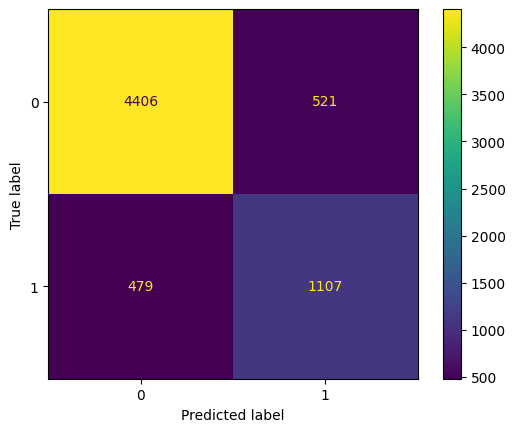

In [23]:
matrix_reg_log = ConfusionMatrixDisplay.from_estimator(model_pipeline, x_test, y_test)

O recall mede a sensibilidade do nosso modelo onde ele irá medir os verdadeiros positivos com os falsos negativos podemos dizer que o recall mostra a precisão de o modelo classificar de forma correta um positivo, para calcular ele basta seguir a seguinte fórmula: 

**VP/(VP+FN)**

**VP**: Verdadeiro positivo
**FN**: Falso negativo 

In [24]:
1107/(521+1107)

0.6799754299754299

O recall é altamente necessário quando um **FN** tem um alto custo, o exemplo, mas claro disso é previsão de doenças onde um FN pode ser mortal.
Imagine um modelo de predição de câncer o falso negativo aqui pode levar a um tratamento, mas caro em um estágio, mas leve a uma morte prematura de uma pessoa que poderia ser salva caso não fosse identificado como falso negativo. 
Na nossa matriz acima teríamos 521 pessoas com câncer que o modelo deixaria de pegar. Precisamos de um modelo melhor hein.

O precison é o contrário do recall onde custo de um falso negativo é extremamente alto, o precision o custo de um falso positivo é muito alto, aqui medimos o quanto nosso modelo é preciso evitando assim que um **Falso Positivo** seja classificado como positivo. Um exemplo disso é no crédito onde dar crédito para alguém que não paga pode custar bem caro já imaginou um empréstimo na casa de milhões para uma empresa de fachada. A fórmula abaixo mostra o cálculo do precision:

**VP/(VP+FP)**

**VP** Verdadeiro positivo
**FP** Falso positivo.

In [25]:
1107/(479+1107)

0.6979823455233292

As diferenças se por arredondamentos dos cálculos e otimizações como pesos para erros.

A nossa última métrica será o **F1-Score** que combina o recall e o precision em uma única métricas, vamos calcular isso abaixo.

In [26]:
f1_log_reg = f1_score(y_test, previsao) * 100
f1_log_reg

68.88612321095209

Sua fórmula é 2* (recall + precision) / 3 ela é mais precisa que a acurácia simples. Vamos calcular usando nossos dados manuais conforme para mostrar como arredondamentos e otimizações interfere nos dados. 

In [27]:
2*((0.679975 * 0.697982)/(0.679975 + 0.697982))

0.6888608431903174

## Conclusão

Esse modelo performa de forma baixa, a precisão de acerto dele é de 84%, mas o dado que, mas nos preocupas é o **F1-Score** com 68% onde praticamente estamos próximos de estar certo em apenas 2/3 dos casos que equivale há 66% de acerto. 